In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import datetime as dt 
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import datetime as dt 
import pandas as pd 
import os

begin_date = dt.date(2020,7,1)
end_date = dt.date(2020,7,13)


limit = 100
lang = 'english'

# load file
with open('C:/myfolderdata/letter.txt', encoding="utf-8")  as df:
    lines = df.readlines()
  
print (lines)
      
     
    


['Big Utilities Are Trying to Deceive Florida Voters With This Anti-Solar Amendment\n', 'by Carolyn Auwaerter\n', '\n', 'Florida’s Amendment 1 is another example of big money polluting our democracy as Duke Energy and others try to block solar energy in the Sunshine State.\n', '\n', 'Duke Energy Balloon Banner in the US\n', "Duke Don't Block Solar.\n", '\n', 'This election season, we have seen countless examples of special interests — including oil and gas companies — spending millions of dollars to influence candidates, fund ballot measures, and attack democracy itself.\n', '\n', 'One of the most egregious is Amendment 71 in Colorado, an attempt to change the rules of the ballot initiative process and make it more difficult for citizens to get initiatives like fracking regulations on the ballot.\n', '\n', 'But Colorado is far from the only state fighting corporate-backed initiatives to drown out the voice of the people. A similar battle is raging in Florida, and the future of solar en

In [3]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in lines:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Big', 'Utilities', 'Are', 'Trying', 'to', 'Deceive', 'Florida', 'Voters', 'With', 'This', 'Anti-Solar', 'Amendment', 'by', 'Carolyn', 'Auwaerter', 'Florida’s', 'Amendment', '1', 'is', 'another', 'example', 'of', 'big', 'money', 'polluting', 'our', 'democracy', 'as', 'Duke', 'Energy', 'and', 'others', 'try', 'to', 'block', 'solar', 'energy', 'in', 'the', 'Sunshine', 'State.', 'Duke', 'Energy', 'Balloon', 'Banner', 'in', 'the', 'US', 'Duke', "Don't", 'Block', 'Solar.', 'This', 'election', 'season,', 'we', 'have', 'seen', 'countless', 'examples', 'of', 'special', 'interests', '—', 'including', 'oil', 'and', 'gas', 'companies', '—', 'spending', 'millions', 'of', 'dollars', 'to', 'influence', 'candidates,', 'fund', 'ballot', 'measures,', 'and', 'attack', 'democracy', 'itself.', 'One', 'of', 'the', 'most', 'egregious', 'is', 'Amendment', '71', 'in', 'Colorado,', 'an', 'attempt', 'to', 'change', 'the', 'rules', 'of', 'the', 'ballot', 'initiative', 'process', 'and', 'make', 'it', 'more', 'di

In [4]:
#Removing Punctuation ^A-Za-z0-9

lines = [re.sub(r'[Za]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [5]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['big',
 'util',
 'are',
 'tri',
 'to',
 'deceiv',
 'florid',
 'voter',
 'with',
 'this',
 'anti-solr',
 'amend',
 'by',
 'crolyn',
 'auwert',
 'florid',
 'amend',
 '1',
 'is',
 'nother',
 'exmpl',
 'of',
 'big',
 'money',
 'pollut',
 'our',
 'democrci',
 's',
 'duke',
 'energi',
 'nd',
 'other',
 'tri',
 'to',
 'block',
 'solr',
 'energi',
 'in',
 'the',
 'sunshin',
 'stte.',
 'duke',
 'energi',
 'blloon',
 'bnner',
 'in',
 'the',
 'us',
 'duke',
 "don't",
 'block',
 'solr.',
 'this',
 'elect',
 'seson,',
 'we',
 'hve',
 'seen',
 'countless',
 'exmpl',
 'of',
 'specil',
 'interest',
 '—',
 'includ',
 'oil',
 'nd',
 'gs',
 'compni',
 '—',
 'spend',
 'million',
 'of',
 'dollr',
 'to',
 'influenc',
 'cndidtes,',
 'fund',
 'bllot',
 'mesures,',
 'nd',
 'ttck',
 'democrci',
 'itself.',
 'one',
 'of',
 'the',
 'most',
 'egregi',
 'is',
 'amend',
 '71',
 'in',
 'colordo,',
 'n',
 'ttempt',
 'to',
 'chnge',
 'the',
 'rule',
 'of',
 'the',
 'bllot',
 'initit',
 'process',
 'nd',
 'mke',
 'it',

In [6]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['big',
 'util',
 'tri',
 'deceiv',
 'florid',
 'voter',
 'anti-solr',
 'amend',
 'crolyn',
 'auwert',
 'florid',
 'amend',
 '1',
 'nother',
 'exmpl',
 'big',
 'money',
 'pollut',
 'democrci',
 's',
 'duke',
 'energi',
 'nd',
 'tri',
 'block',
 'solr',
 'energi',
 'sunshin',
 'stte.',
 'duke',
 'energi',
 'blloon',
 'bnner',
 'duke',
 "don't",
 'block',
 'solr.',
 'elect',
 'seson,',
 'hve',
 'seen',
 'countless',
 'exmpl',
 'specil',
 'interest',
 '—',
 'includ',
 'oil',
 'nd',
 'gs',
 'compni',
 '—',
 'spend',
 'million',
 'dollr',
 'influenc',
 'cndidtes,',
 'fund',
 'bllot',
 'mesures,',
 'nd',
 'ttck',
 'democrci',
 'itself.',
 'egregi',
 'amend',
 '71',
 'colordo,',
 'n',
 'ttempt',
 'chnge',
 'rule',
 'bllot',
 'initit',
 'process',
 'nd',
 'mke',
 'difficult',
 'citizen',
 'initit',
 'like',
 'frcking',
 'regult',
 'bllot.',
 'colordo',
 'fr',
 'onli',
 'stte',
 'fight',
 'corporte-bck',
 'initit',
 'drown',
 'voic',
 'people.',
 'similr',
 'bttle',
 'rging',
 'florid,',
 'nd',

In [7]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()
#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [8]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1419, 2: 337, 3: 156, 4: 91, 5: 46, 6: 38, 7: 24, 10: 20, 9: 16, 8: 15, ...})

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\elisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


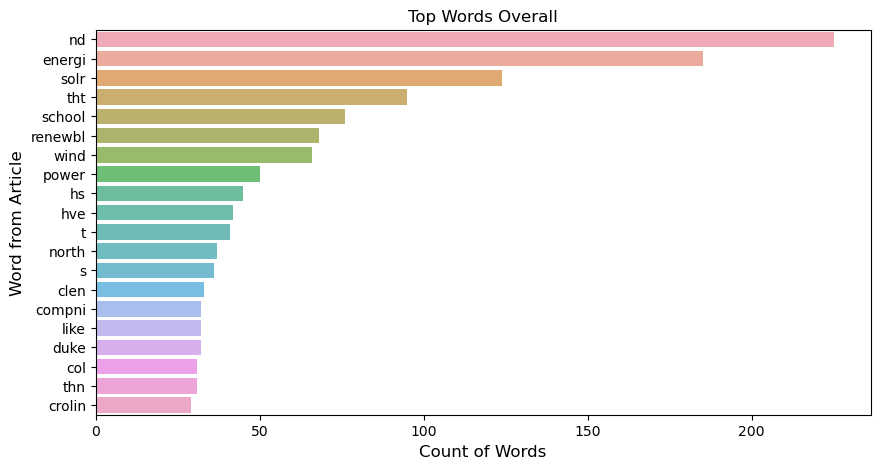

In [10]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Article', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [11]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [12]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [13]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

C:\Users\elisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


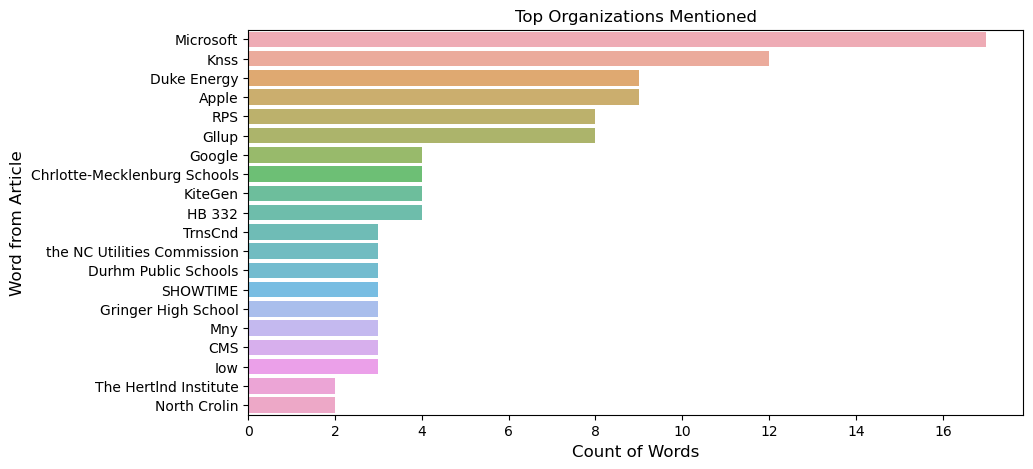

In [14]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Article', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [15]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

C:\Users\elisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


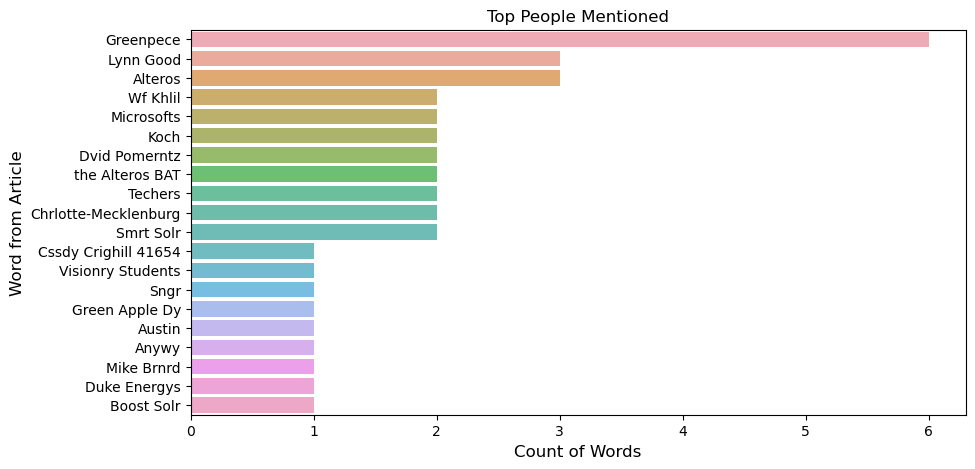

In [16]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Article', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()